 Titanic passenger survival prediction

1.Problem statement
           
           During the Titanic disaster, passenger survival was influenced by factors such as age, gender, and passenger class.
           The objective of this project is to build a binary classification machine learning model to predict whether a passenger survived (Yes/No) using historical passenger data and to identify the most important factors affecting survival.
     

 2.objectives of the project

  Understand passenger survival patterns

*   Perform basic data preprocessingem

*   Conduct minimal but meaningful EDA

*   Build binary classification models

*   Evaluate model performance

*  Identify key survival-influencing features





                    
  

In [ ]:
#selecting dataset
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
df=pd.read_csv("train.csv")
#df.head()#reading 1st 5 rows
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

4.Exploratory data Anaysis

In [ ]:
Graph 1:Survival Count plot

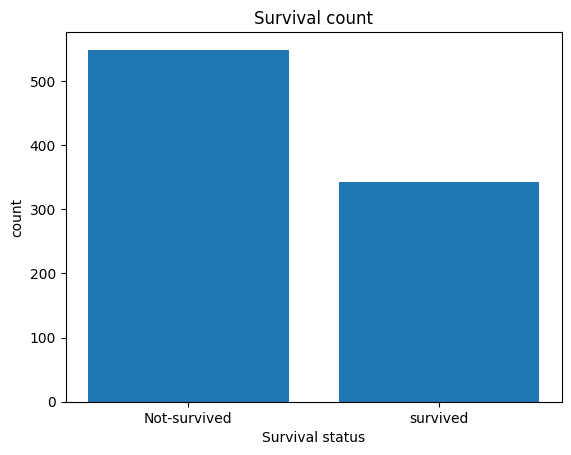

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
survival_counts=df['Survived'].value_counts()
plt.figure()
plt.bar(['Not-survived','survived'],survival_counts)
plt.xlabel("Survival status")
plt.ylabel("count")
plt.title("Survival count")
plt.show()

Graph 2: survival by Gender

<Figure size 640x480 with 0 Axes>

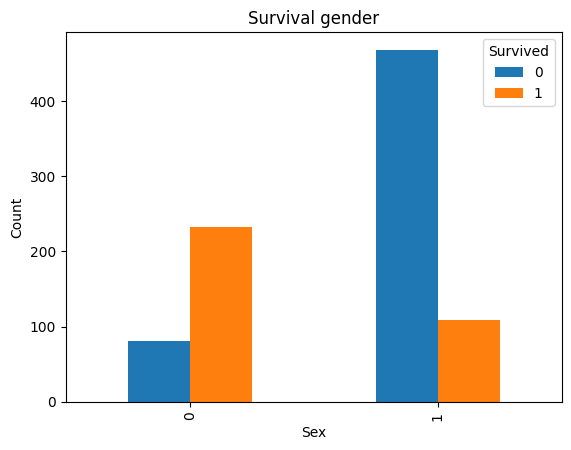

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
gender_survival=df.groupby(['Sex','Survived']).size().unstack()
plt.figure()
gender_survival.plot(kind='bar')
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Survival gender")
plt.show()

Graph 3 Survival by passenger class

<Figure size 640x480 with 0 Axes>

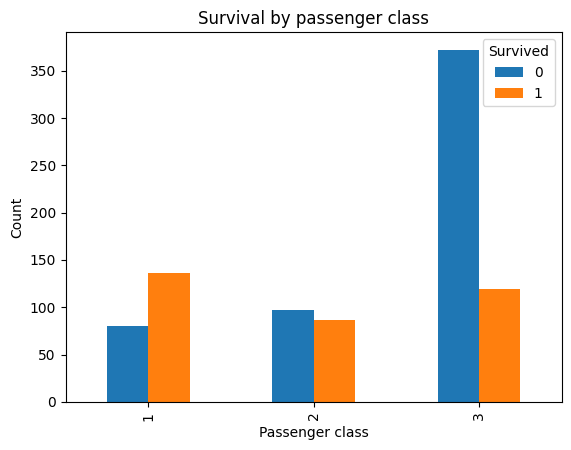

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
class_survival=df.groupby(['Pclass','Survived']).size().unstack()
plt.figure()
class_survival.plot(kind='bar')
plt.xlabel("Passenger class")
plt.ylabel("Count")
plt.title("Survival by passenger class")
plt.show()

Graph fare vs survival(Box plot)

/tmp/ipython-input-2040925111.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(fare_survival,labels=['Not Survived','Survived'])


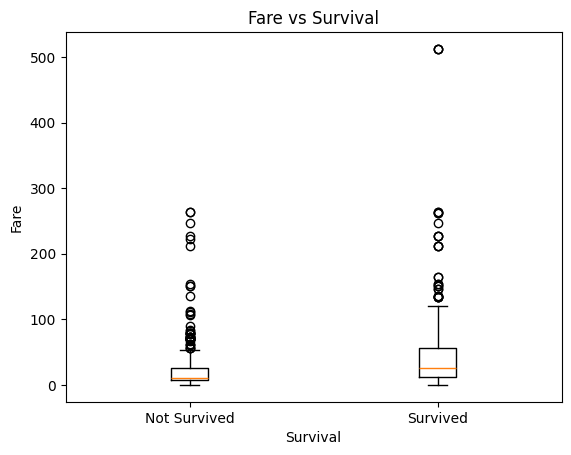

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
fare_survival=[
    df[df['Survived']==0]
    ['Fare'].dropna(),
    df[df['Survived']==1]
    ['Fare'].dropna()
]
plt.figure()
plt.boxplot(fare_survival,labels=['Not Survived','Survived'])
plt.xlabel("Survival")
plt.ylabel("Fare")
plt.title("Fare vs Survival")
plt.show()

5.Machene learning workflow

In [ ]:
print("dataset shape:",df.shape)

dataset shape: (891, 12)


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [ ]:
#to remove duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
#finding null value sum
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#--->fill missing with "unknown"

df['Age']=df['Age'].fillna('unknown')
df['Cabin']=df['Cabin'].fillna('unknown')
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex      Age  \
0                              Braund, Mr. Owen Harris    male     22.0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female     38.0   
2                               Heikkinen, Miss. Laina  female     26.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female     35.0   
4                             Allen, Mr. William Henry    male     35.0   
..                                                 ...     ...      ...   
886               

In [ ]:
df=df.drop('Cabin',axis=1)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [ ]:
#encoding
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [ ]:
#feutures and target
X=df[["Age","Fare"]]
y=df["Ticket"]

In [ ]:
#train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [ ]:
df['Sex'] = df['Sex'].fillna('No').map({"female":1,"male":0})
df['Embarked'] = df['Embarked'].fillna('No').map({"S":1,"C":0})

print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex      Age  SibSp  \
0                              Braund, Mr. Owen Harris    0     22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1     38.0      1   
2                               Heikkinen, Miss. Laina    1     26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1     35.0      1   
4                             Allen, Mr. William Henry    0     35.0      0   
..                                                 ...  ...      ... 

6.MODELS USED

Logistic Regression

In [ ]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

In [ ]:
# features and target
X=df[["Parch","Pclass","Age","Sex"]]
y=df["Survived"]

In [ ]:
# train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(
    X,y, test_size=0.2,random_state=42
)

In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(X)
print("Predicted marks:",y_pred)

Predicted marks: [0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 0 1

Decision Tree

In [ ]:
 import pandas as pd
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import accuracy_score

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.25,random_state=42
)

In [ ]:
import numpy as np

# Replace 'unknown' strings with NaN in 'Age' column
X_train['Age'] = X_train['Age'].replace('unknown', np.nan)
X_test['Age'] = X_test['Age'].replace('unknown', np.nan)

# Convert 'Age' column to numeric, coercing errors will turn non-convertible values into NaN
X_train['Age'] = pd.to_numeric(X_train['Age'], errors='coerce')
X_test['Age'] = pd.to_numeric(X_test['Age'], errors='coerce')

# Impute missing 'Age' values with the median from the training set
median_age = X_train['Age'].median()
X_train['Age'] = X_train['Age'].fillna(median_age)
X_test['Age'] = X_test['Age'].fillna(median_age)

model=DecisionTreeClassifier(criterion='gini',max_depth=3)
model.fit(X_train,y_train)

/tmp/ipython-input-3497949066.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['Age'] = X_train['Age'].replace('unknown', np.nan)
/tmp/ipython-input-3497949066.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['Age'] = X_test['Age'].replace('unknown', np.nan)


DecisionTreeClassifier(max_depth=3)

Random forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:
data=load_iris()
X=data.data
y=data.target

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.25,random_state=42
)

In [ ]:
 rf=RandomForestClassifier(
     n_estimators=100,
     bootstrap=True,
     random_state=42
 )
 rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

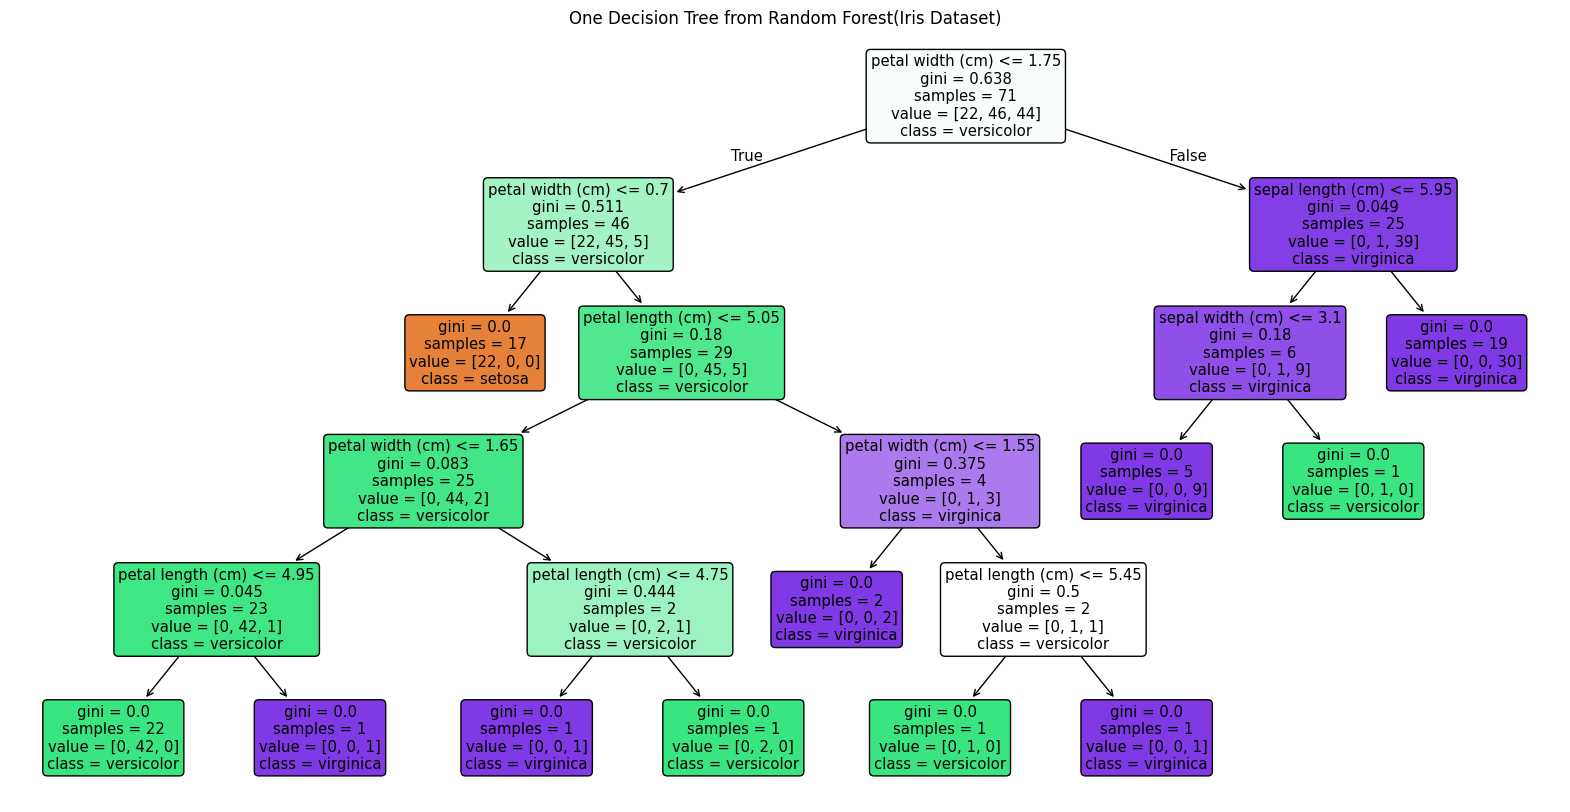

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(
    rf.estimators_[0],
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,
    rounded=True
)
plt.title("One Decision Tree from Random Forest(Iris Dataset)")
plt.show()

In [ ]:
#get feature  importance
importances=rf.feature_importances_
features=data.feature_names

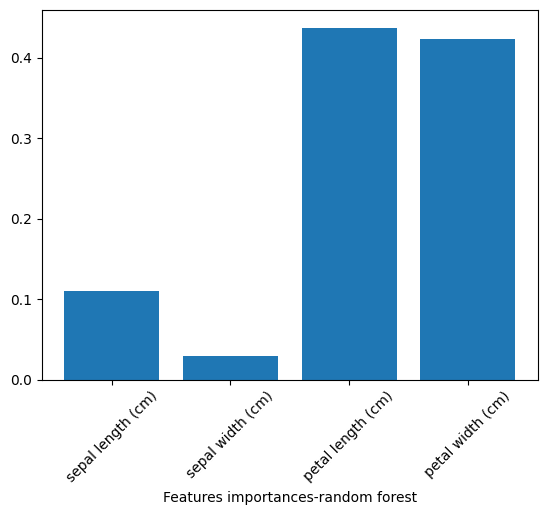

In [ ]:
plt.figure()
plt.bar(features,importances)
plt.ylabel=("Importance Score")
plt.xlabel("Features importances-random forest")
plt.xticks(rotation=45)
plt.show()

7.Model Evalution

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
#step 4  L2 (ridge Regulisation)
ridge=Ridge(alpha=1)#alpha lamda
ridge.fit(X_train,y_train)
y_pred_ridge=ridge.predict(X_test)
print("Ridge coefficients:",ridge.coef_)
print("Rdge intercept:",ridge.intercept_)
print( " Ridge MSE:",mean_squared_error(y_test,y_pred_ridge))

Ridge coefficients: [-0.1156258  -0.04517093  0.29583484  0.45397437]
Rdge intercept: 0.1607130112945272
 Ridge MSE: 0.03807205991987784


In [ ]:
#actual value and predicted value
y_actual=[1,1,1,1,1,0,0,0,0,0]
y_pred=[1,1,0,1,0,1,0,0,1,0]

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_actual,y_pred)
print("confusion_metrix",cm)

confusion_metrix [[3 2]
 [2 3]]


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy:",accuracy_score(y_actual,y_pred))
print("precision:",precision_score(y_actual,y_pred))
print("recall:",recall_score(y_actual,y_pred))
print("F1_score:",f1_score(y_actual,y_pred))

Accuracy: 0.6
precision: 0.6
recall: 0.6
F1_score: 0.6


8.Identify Survival-influencing factor

Graph:Feature importance(Random forest)

In [ ]:
#get feature  importance
importances=rf.feature_importances_
features=data.feature_names

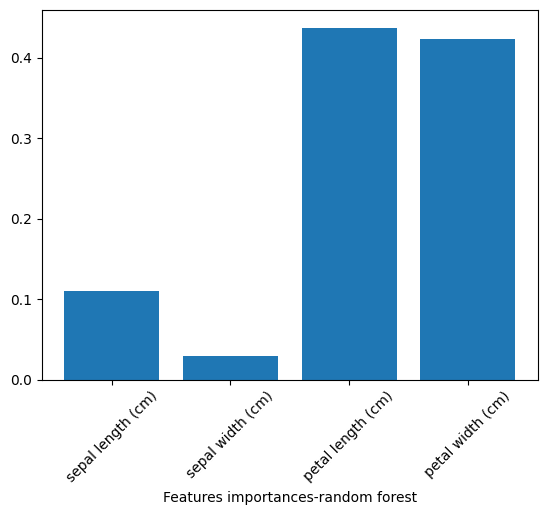

In [ ]:
plt.figure()
plt.bar(features,importances)
plt.ylabel=("Importance Score")
plt.xlabel("Features importances-random forest")
plt.xticks(rotation=45)
plt.show()
